In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [63]:
df=pd.read_csv('soccer.csv')
df.head()

,Country,League,Club,Player Names,Matches_Played,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year,sub
0,Spain,La Liga,(BET),Juanmi Callejon,19,1849,11,6.62,0.34,48,20,2.47,1.03,2016,16
1,Spain,La Liga,(BAR),Antoine Griezmann,36,3129,16,11.86,0.36,88,41,2.67,1.24,2016,0
2,Spain,La Liga,(ATL),Luis Suarez,34,2940,28,23.21,0.75,120,57,3.88,1.84,2016,1
3,Spain,La Liga,(CAR),Ruben Castro,32,2842,13,14.06,0.47,117,42,3.91,1.40,2016,3
4,Spain,La Liga,(VAL),Kevin Gameiro,21,1745,13,10.65,0.58,50,23,2.72,1.25,2016,10


In [52]:
df.shape

(660, 15)

In [66]:
df['sub']

0      16
1       0
2       1
3       3
4      10
       ..
655     0
656     2
657     0
658     0
659    11
Name: sub, Length: 660, dtype: int64

# Q1: What is the total number of goals scored in the entire dataset?




In [5]:
total_goals = df['Goals'].sum()


In [6]:
print("Total number of goals scored:", total_goals)

Total number of goals scored: 7795


# Q2: Which player has scored the most goals as a substitution

In [67]:
max_goals_substitution = df[df['sub'] > 0]['Goals'].idxmax()
player_most_goals_substitution = df.loc[max_goals_substitution, 'Player Names']



In [68]:
print("Player with the most goals as a substitution:", player_most_goals_substitution)

Player with the most goals as a substitution: Lionel Messi


# Q3: Find the top 5 players with the most number of goals scored. Also find the total number of goals scored by them

In [10]:
top_5_players = df.nlargest(5, 'Goals')[['Player Names', 'Goals']]
total_goals_top_5 = top_5_players['Goals'].sum()


In [11]:
print("Top 5 players with the most goals:")
print(top_5_players)
print("Total goals scored by top 5 players:", total_goals_top_5)

Top 5 players with the most goals:
          Player Names  Goals
5    Cristiano Ronaldo     42
12        Lionel Messi     37
195       Lionel Messi     36
317        Carlos Vela     36
391      Ciro Immobile     36
Total goals scored by top 5 players: 187


# Q4: What are the top 10 countries with the most number of players in the dataset?

In [12]:
top_10_countries = df['Country'].value_counts().head(10)

In [13]:
print("Top 10 countries with the most players:")
print(top_10_countries)


Top 10 countries with the most players:
Spain           100
Italy           100
Germany         100
Brazil          100
England          80
France           60
USA              40
Portugal         40
 Netherlands     40
Name: Country, dtype: int64


# Q5: # Q1. Create a new dataframe after removing the ourliers for Mins Column in the dataset (conside the upper quantile to be 99 percentile and the lower quantile to be 1 percentile.). After that Find the difference in the number of rows?

* Difference is df.shape(only rows) - df.shape(rows of filtered data only)

In [14]:
lower_quantile = df['Mins'].quantile(0.01)
upper_quantile = df['Mins'].quantile(0.99)
filtered_df = df[(df['Mins'] >= lower_quantile) & (df['Mins'] <= upper_quantile)]
difference_rows = df.shape[0] - filtered_df.shape[0]

In [15]:
print("Difference in the number of rows:", difference_rows)

Difference in the number of rows: 14


# Q6: Which top 5 players have scored the maximum number of goals throughout all the years? Display them in descending order

In [16]:
top_5_players_goals = df.groupby('Player Names')['Goals'].sum().nlargest(5)
print("Top 5 players with the maximum number of goals:")

Top 5 players with the maximum number of goals:


In [17]:
print(top_5_players_goals)

Player Names
Lionel Messi          135
Cristiano Ronaldo     128
Robert Lewandowski    127
Ciro Immobile         107
Luis Suarez            95
Name: Goals, dtype: int64


# Q7. Using Bar Plot show in which year has Cristiano Ronaldo scored the most number of goals?

In [18]:
cr7_goals_by_year = df[df['Player Names'] == 'Cristiano Ronaldo'].groupby('Year')['Goals'].sum()
year_most_goals_cr7 = cr7_goals_by_year.idxmax()

In [19]:
print("Year in which Cristiano Ronaldo scored the most goals:", year_most_goals_cr7)

Year in which Cristiano Ronaldo scored the most goals: 2016


# Q8. In the year 2019 who has more Goals between Ronaldo and Messi? 
- First print them normally 
- Display the comparison using a bar plot

In [20]:
goals_ronaldo_2019 = df[(df['Player Names'] == 'Cristiano Ronaldo') & (df['Year'] == 2019)]['Goals'].sum()
goals_messi_2019 = df[(df['Player Names'] == 'Lionel Messi') & (df['Year'] == 2019)]['Goals'].sum()

In [21]:
print("Goals scored by Ronaldo in 2019:", goals_ronaldo_2019)
print("Goals scored by Messi in 2019:", goals_messi_2019)

Goals scored by Ronaldo in 2019: 31
Goals scored by Messi in 2019: 25


# Q9: Using Pie Chart show the amount of data various Countries are containing in this dataset(use the Country Columns Display the percentage of data as well in the pie chart

Text(0.5, 1.0, 'Percentage of Data by Country')

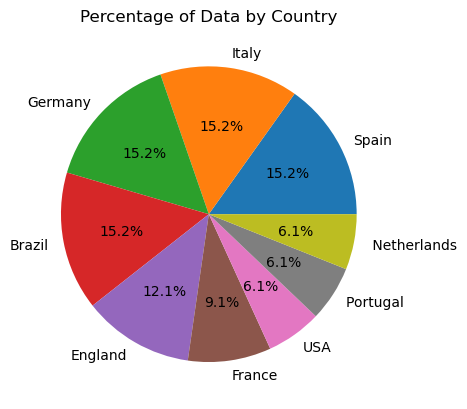

In [70]:
country_data_count = df['Country'].value_counts()
plt.pie(country_data_count, labels=country_data_count.index, autopct='%1.1f%%')
plt.title("Percentage of Data by Country")


# Q10: Display a Heatmap  to show the correlation between the columns in the dataset. The heatmap should have the value of the correlation printed within the boxes.

C:\Users\Rinkesh\AppData\Local\Temp\ipykernel_9304\845910043.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


Text(0.5, 1.0, 'Correlation Heatmap')

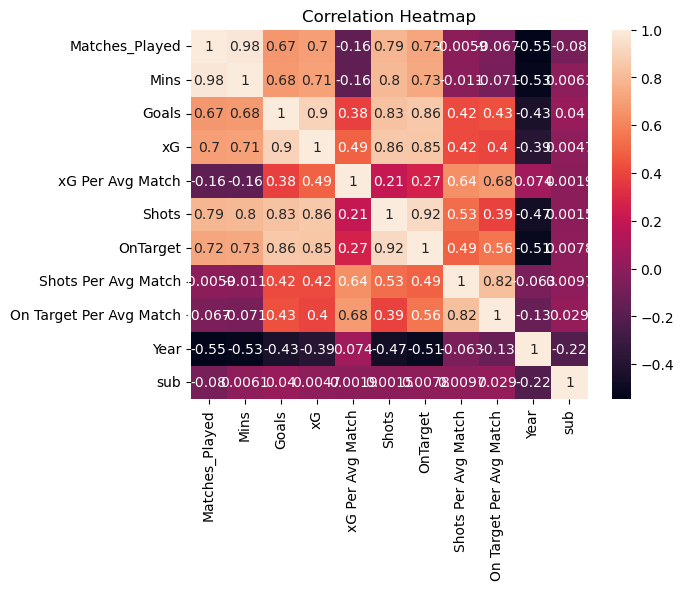

In [71]:
correlation = df.corr()
sns.heatmap(correlation, annot=True)
plt.title("Correlation Heatmap")

# Q11: Which Country has the maximum median OnTarget Shots among all the Countries in the year 2020?

In [29]:
country_max_median_ontarget = df[df['Year'] == 2020].groupby('Country')['OnTarget'].median().idxmax()


In [30]:
print("Country with the maximum median OnTarget Shots in 2020:", country_max_median_ontarget)

Country with the maximum median OnTarget Shots in 2020:  Netherlands


# Q12. Who has the best average  Goals per minute?
* Consider only those players who have played more than 30 games
* Then Find Goals per minute
* Find Mean of Goals per minute and sort the values

In [31]:
df_filtered_games = df[df['Matches_Played'] > 30]
df_filtered_games['Goals_per_minute'] = df_filtered_games['Goals'] / df_filtered_games['Mins']
best_avg_goals_minute = df_filtered_games.groupby('Player Names')['Goals_per_minute'].mean().idxmax()

C:\Users\Rinkesh\AppData\Local\Temp\ipykernel_9304\1969874278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_games['Goals_per_minute'] = df_filtered_games['Goals'] / df_filtered_games['Mins']


In [32]:
print("Player with the best average Goals per minute (played more than 30 games):", best_avg_goals_minute)

Player with the best average Goals per minute (played more than 30 games): Carlos Vela


# Q 13. Which Player has the least and most number of missed shots in the dataset?
* Missed Shots=Shots-On Target

In [33]:
df['Missed_Shots'] = df['Shots'] - df['OnTarget']
player_least_missed_shots = df.loc[df['Missed_Shots'].idxmin(), 'Player Names']
player_most_missed_shots = df.loc[df['Missed_Shots'].idxmax(), 'Player Names']

In [34]:
print("Player with the least missed shots:", player_least_missed_shots)
print("Player with the most missed shots:", player_most_missed_shots)

Player with the least missed shots: Esteban Burgos
Player with the most missed shots: Cristiano Ronaldo


# Q14: How many countries have had players who played more than 35 matches? Create a bar plot to display the count for each country.

In [37]:
countries_players_more_than_35 = df[df['Matches_Played'] > 35]['Country'].unique()
countries_count = len(countries_players_more_than_35)
print("Number of countries with players who played more than 35 matches:", countries_count)

Number of countries with players who played more than 35 matches: 5


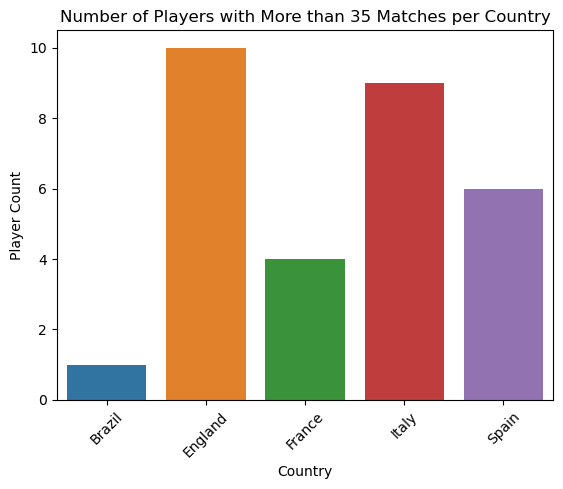

In [38]:
countries_count_df = df[df['Matches_Played'] > 35].groupby('Country')['Player Names'].nunique().reset_index()
countries_count_plot = sns.barplot(x='Country', y='Player Names', data=countries_count_df)
countries_count_plot.set_xticklabels(countries_count_plot.get_xticklabels(), rotation=45)
plt.xlabel("Country")
plt.ylabel("Player Count")
plt.title("Number of Players with More than 35 Matches per Country")
plt.show()


# Q15: Draw a Line Chart to show the comparison of the top 5 highest scoring players in the dataset throughout the years(2016-2020)

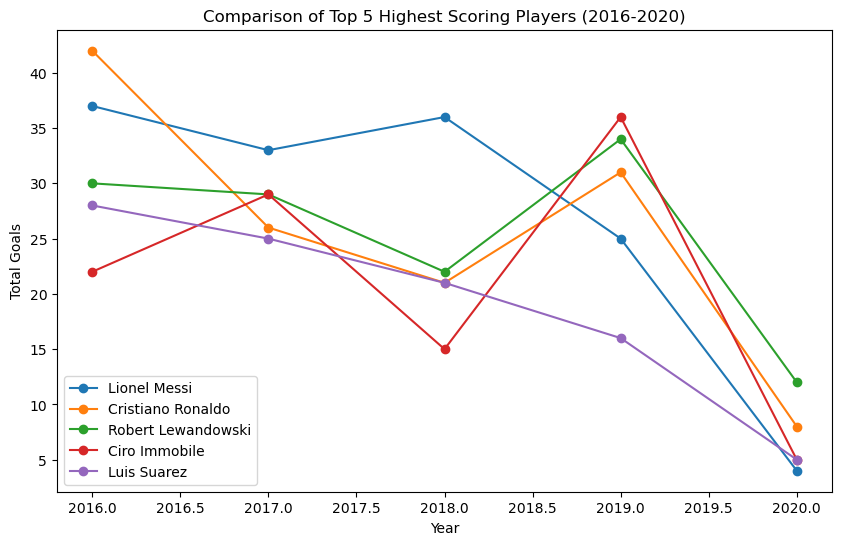

In [74]:

top_5_players = df.groupby('Player Names')['Goals'].sum().nlargest(5).index
top_5_players_data = df[df['Player Names'].isin(top_5_players)]

plt.figure(figsize=(10, 6))
for player in top_5_players:
    player_data = top_5_players_data[top_5_players_data['Player Names'] == player]
    plt.plot(player_data['Year'], player_data['Goals'], marker='o', label=player)

plt.xlabel("Year")
plt.ylabel("Total Goals")
plt.title("Comparison of Top 5 Highest Scoring Players (2016-2020)")
plt.legend()
plt.show()
